# EDA Students Performance Indicator 

## 1) Problem statement

The below analysis depicts how the performance of the students (reflected by test scores) is influenced by other variables such as Ethnicity, Parental level of education, Gender, Lunch and Test preparation course.

## 2) Dataset Source 

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('stud.csv', encoding='latin-1')

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## About the dataset

gender : (Male/female)

race/ethnicity : the ethnicity of the students - (Group A, B, C, D, E)

parental level of education : the education qualification of the parents - (bachelor's degree, some college, master's degree, associate's degree, high school) 

lunch : lunch taken before the exam (standard or free/reduced)

test preparation course : completed or not completed before the exam

math score

reading score

writing score

# Data Checks 

#### 1. Checking the number of observations and the number of features

In [10]:
df.shape

(1000, 8)

#### So there are 1000 observations (rows) and 8 features (columns)

#### 2. Checking for the Missing values

In [11]:
pd.isnull(df).sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### So it can be seen that there are no missing values in the entire dataset

#### 3. Checking if there there are any Duplicate valus in the dataset

In [12]:
df.duplicated().sum()

0

#### So there are no duplicate values in the dataset

#### 4. Checking the datatypes

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### So, gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course are categorical features

#### And, math_score, reading_score, writing_score are numerical features

#### 5. Checking the number of unique values of each column or feature

In [14]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### The above numbers show the number unique values of the respective features.

#### 6. Checking the descriptive statistics of data set

In [15]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### The descriptive statistics are valid only for the numerical data
#### The above table shows the total number of values, the average value, the standard deviation, the minimum value, the 25th percentile (Q1), the 50th percentile (Median), the 75th percentile (Q3), and the maximum value of the math_score, reading_score and writing_score

## Based of the three types of scores, calculate the total score and the average score 

In [16]:
df['total_score']=(df.math_score + df.reading_score + df.writing_score)
df['average_score']=(df.math_score + df.reading_score + df.writing_score)/3

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Check the performance of the students based on gender 

In [31]:
df.groupby('gender').mean('total_score')

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


#### So it can be seen that on an average, the male students performed better in maths as compared to the female students. However in the other two fields the female students showed a better performnce. Also, the total and the average scores are higher for the female students.

### Visualization of the above analysis

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='average_score', ylabel='Count'>

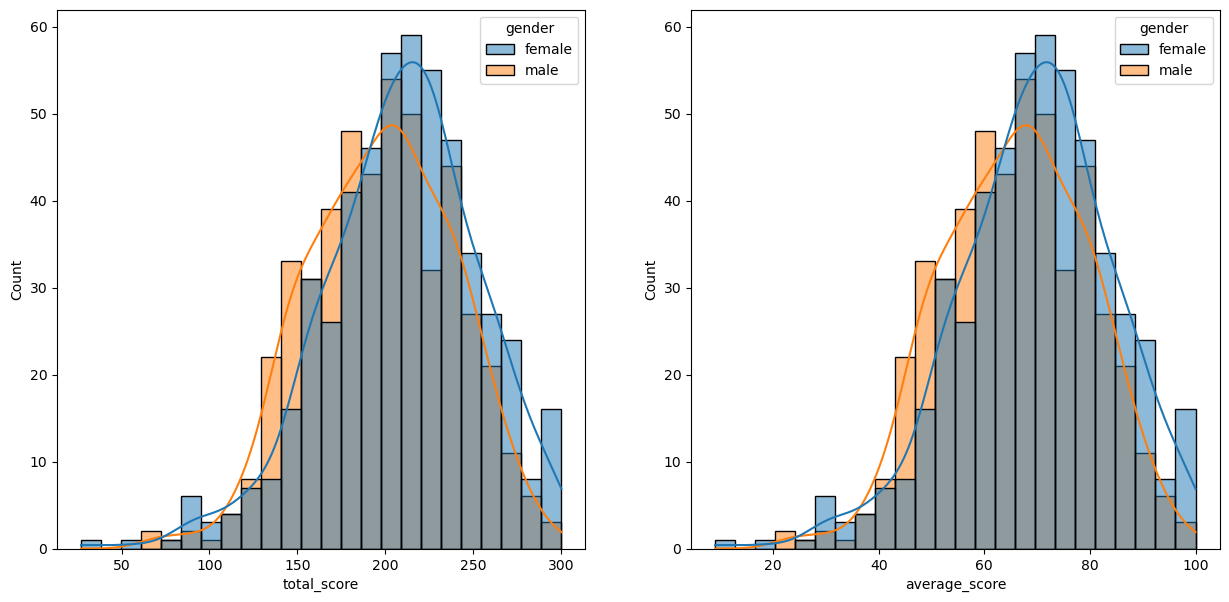

In [33]:
fig,axis = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')

<AxesSubplot: xlabel='writing_score', ylabel='Count'>

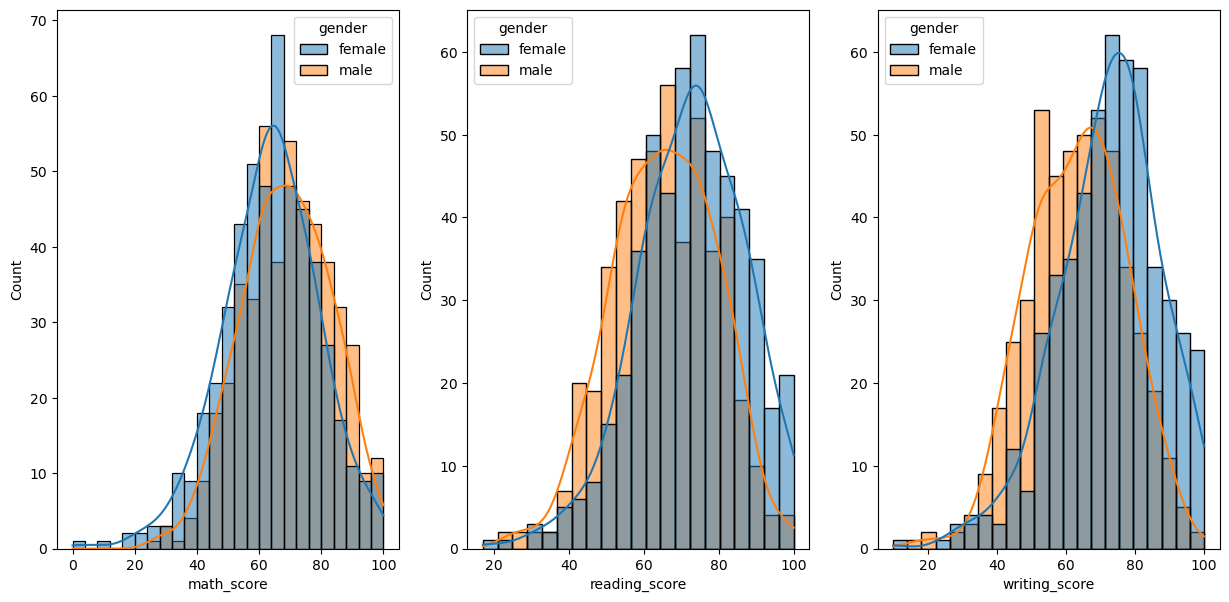

In [34]:
fig,axis = plt.subplots(1,3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df, x='math_score', kde=True, hue='gender')
plt.subplot(132)
sns.histplot(data=df, x='reading_score', kde=True, hue='gender')
plt.subplot(133)
sns.histplot(data=df, x='writing_score', kde=True, hue='gender')

## Insights and Observation 
#### Overall, female students tend to perform better as compared to male students.

## Check and analyze how the 'race_ethnicity' of the students affects the average_score of male and female students

Text(0.5, 1.0, 'Male')

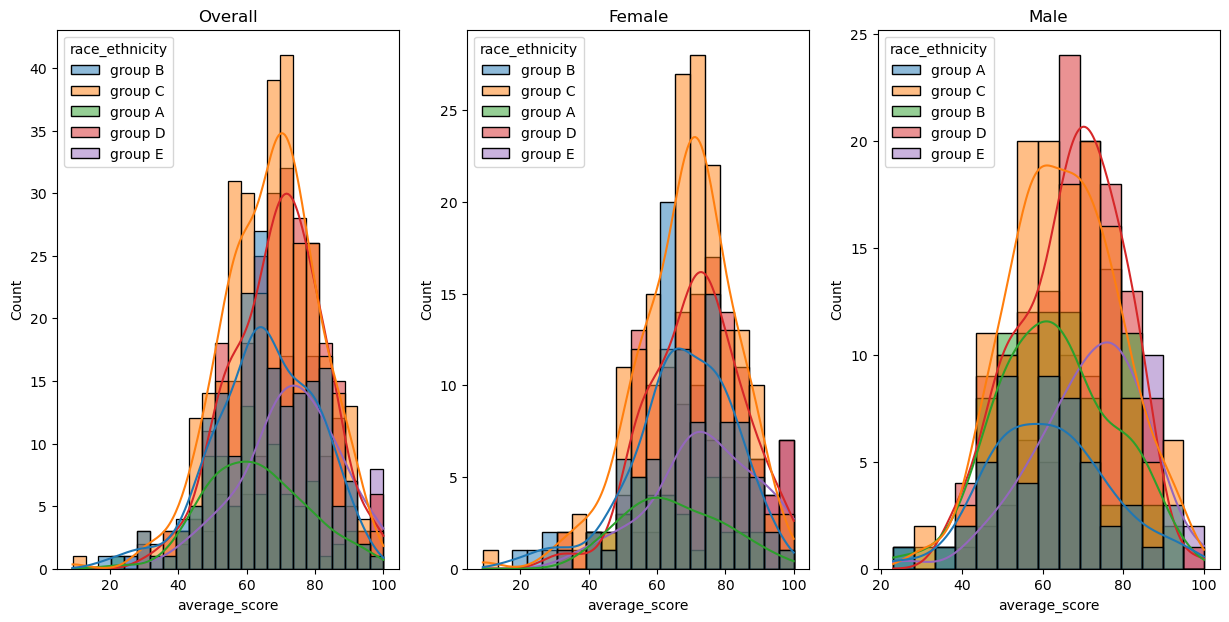

In [28]:
fig,axis = plt.subplots(1,3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df, x='average_score', hue='race_ethnicity', kde=True)
plt.title('Overall')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average_score', hue='race_ethnicity', kde=True)
plt.title('Female')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', hue='race_ethnicity', kde=True)
plt.title('Male')

## Insights and Observations
#### In general, students belonging group A and group E tend to perform poorly in exams.
#### Students belonging to group A and group E tend to perform poorly in exam irrespective of the student being a male or a female.

## Check and analyze how the 'parental_level_of_education' affects the average_score of male and female students

Text(0.5, 1.0, 'Male')

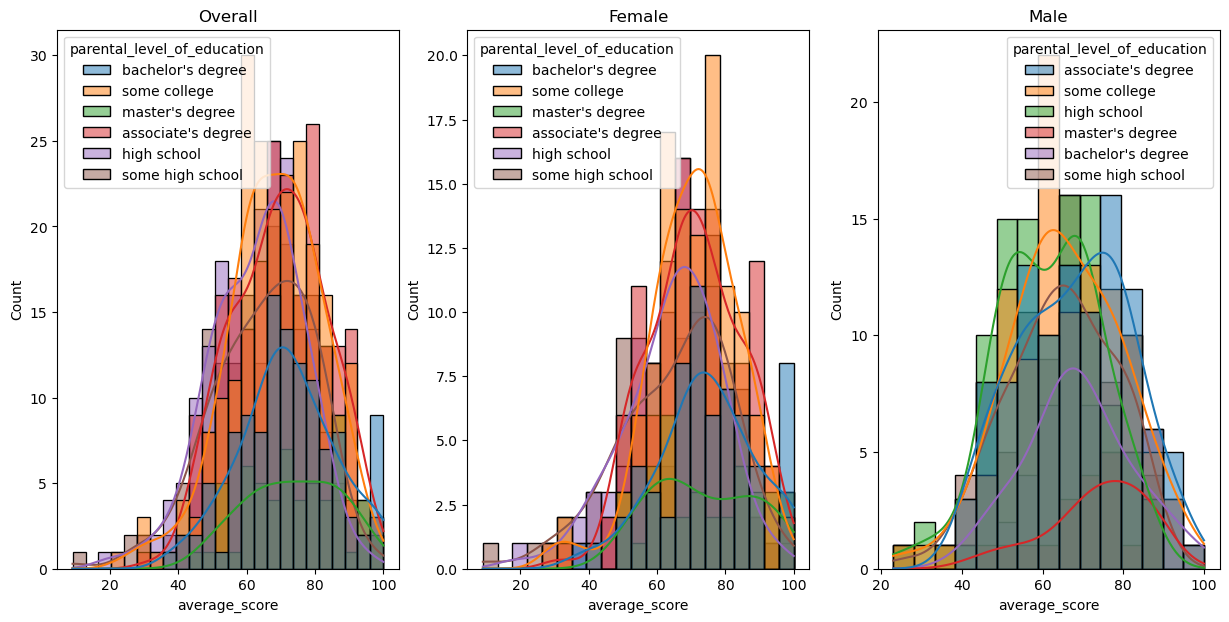

In [29]:
fig,axis = plt.subplots(1,3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df, x='average_score', hue='parental_level_of_education', kde=True)
plt.title('Overall')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average_score', hue='parental_level_of_education', kde=True)
plt.title('Female')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', hue='parental_level_of_education', kde=True)
plt.title('Male')

## Insights and Observations
#### Parental level of education doesn't influence their children's performance much in the exam both in case of male and female students.

## Check and analyze how 'lunch' affects the average_score of male and female students

Text(0.5, 1.0, 'Male')

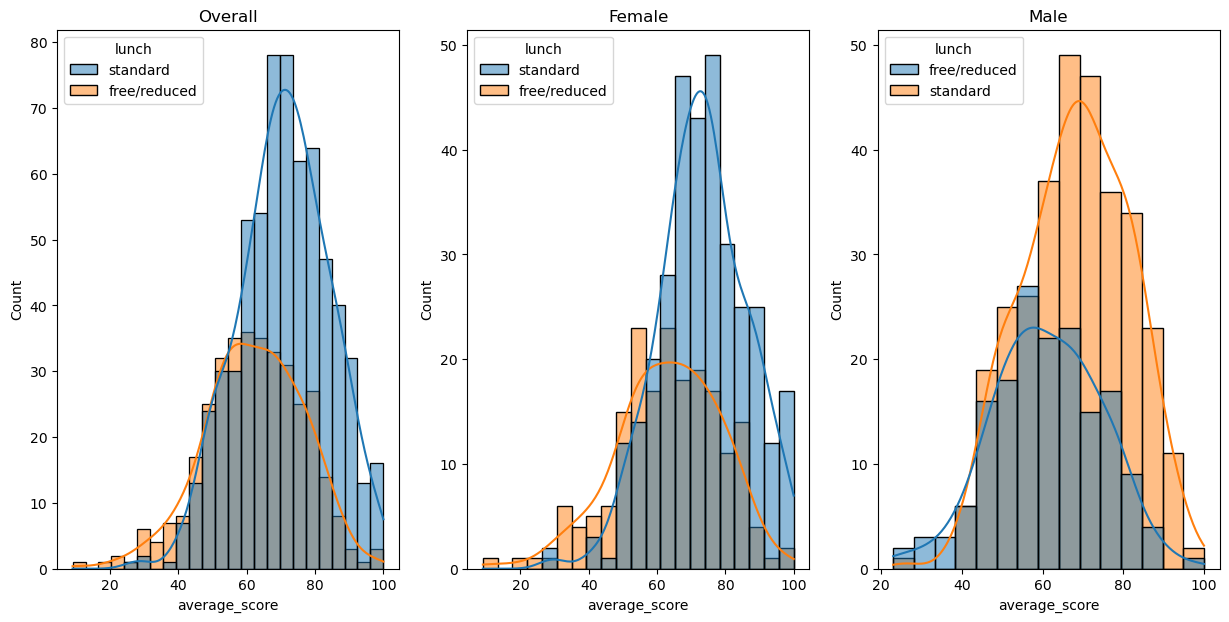

In [36]:
fig,axis = plt.subplots(1,3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df, x='average_score', hue='lunch', kde=True)
plt.title('Overall')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average_score', hue='lunch', kde=True)
plt.title('Female')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', hue='lunch', kde=True)
plt.title('Male')

## Insights and Observations
#### It shows that lunch has a huge impact on the overall performance of the students. 
#### If students have standard lunch, it resultes in higher average test score as compared to the average test score with free or reduced lunch irrespective of male and female students.

## Check and analyze how 'test_preparation_course' affects the average_score of male and female students

Text(0.5, 1.0, 'Male')

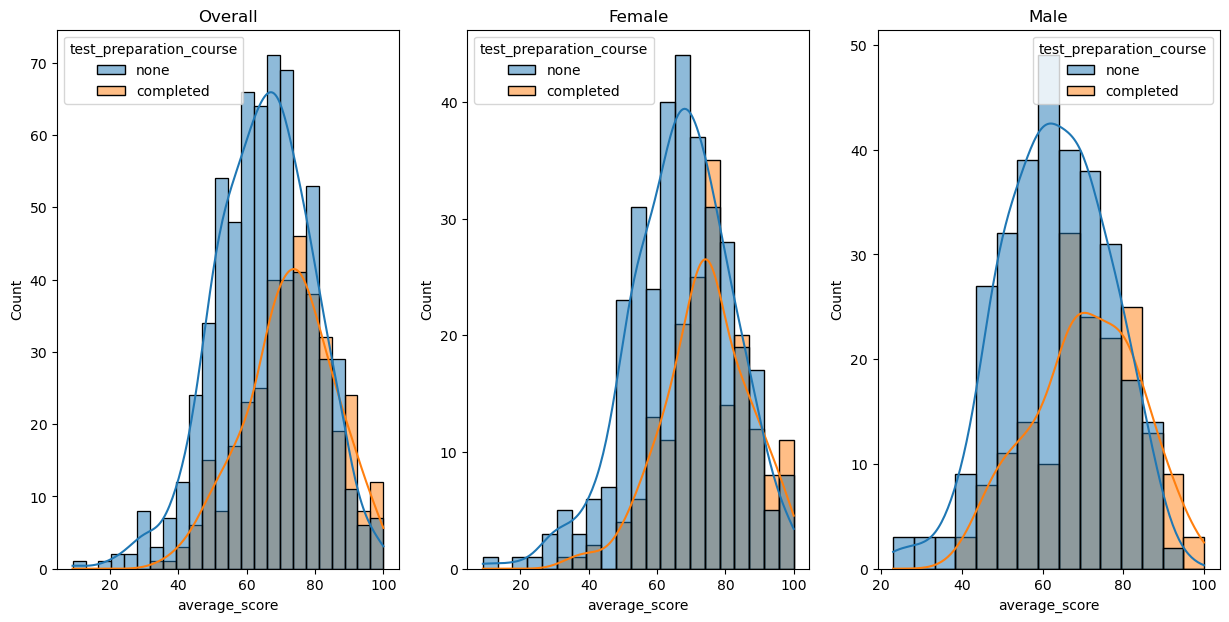

In [39]:
fig,axis = plt.subplots(1,3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df, x='average_score', hue='test_preparation_course', kde=True)
plt.title('Overall')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average_score', hue='test_preparation_course', kde=True)
plt.title('Female')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', hue='test_preparation_course', kde=True)
plt.title('Male') 

## Insights and Observations
#### It shows that students not compleating the test_preperation_course before exam tend to perform better in the exam as compared to students who completes the test_preperation_course.
#### The observation holds same for both male and female st